Importing necessary packages:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import drive                       #This is to import the datasets which are uploaded to Google drive
drive.mount('/content/drive')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading testing and training data:

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/House prices prediction dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/House prices prediction dataset/test.csv')

Merging Training and testing data:

In [3]:
Df = pd.concat([train_df,test_df])
SalePrice = Df["SalePrice"]
Df.drop("SalePrice",axis=1,inplace=True)

Inspecting data, column types and rows:

In [4]:
Df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

So, we have a total of 80 columns/features.

In [6]:
Df.shape

(2919, 80)

Total rows in the dataset are 2919.

In [7]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

In [8]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [9]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are a mix of categorical and numerical features to work with.

### **Exploratory Data Abalysis (EDA):**

In [10]:
Df[numerical_features].isnull().any()

,0
Id,False
MSSubClass,False
LotFrontage,True
LotArea,False
OverallQual,False
OverallCond,False
YearBuilt,False
YearRemodAdd,False
MasVnrArea,True
BsmtFinSF1,True


In [11]:
Df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,486
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,23
BsmtFinSF1,1


The 1459 null values in the SalePrice column are probably the ones that need to be predicted by our model.
'LotFrontage', 'GarageYrBlt' and 'MasVnrArea' columns have significantly higher null values. We need to decide what to do about them.

As per the data_description file that was packaged along with the datasets from Kaggle, following are the descriptions of a few column features which have higher number of null values:

1. LotFrontage - Linear feet of street connected to property
2. GarageYrBlt - Year garage was built
3. MasVnrArea: Masonry veneer area in square feet


In [12]:
Df['LotFrontage'] = Df['LotFrontage'].fillna(Df['LotFrontage'].mean())
Df['GarageYrBlt'] = Df['GarageYrBlt'].fillna(Df['GarageYrBlt'].mean())
Df['MasVnrArea'] = Df['MasVnrArea'].fillna(Df['MasVnrArea'].mean())

So, we have replaced the null values in these columns with the mean of all values in that column.

In [13]:
Df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,1


For the rest of the missing value rows, we will drop them as they are lesser frequent in the dataset and will not lead to huge data loss.

In [15]:
Df[numerical_features].dropna(axis=0,inplace=True)

<ipython-input-15-6c257c3929eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df[numerical_features].dropna(axis=0,inplace=True)


In [16]:
Df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,1


In [17]:
Df[categorical_features].isnull().sum()

,0
MSZoning,4
Street,0
Alley,2721
LotShape,0
LandContour,0
Utilities,2
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


The categorical features with null values are described, as follows:

1. Alley: Type of alley access to property
2. MasVnrType: Masonry veneer type
3. BsmtQual: Evaluates the height of the basement
4. BsmtCond: Evaluates the general condition of the basement
5. BsmtExposure: Refers to walkout or garden level walls
6. BsmtFinType1: Rating of basement finished area
7. BsmtFinType2: Rating of basement finished area
8. Electrical: Electrical system
9. KitchenQual: Kitchen quality
10. Functional: Home functionality
11. FireplaceQuL: Number of fireplaces
12. GarageType: Garage location
13. GarageFinish: Interior finish of the garage
14. GarageQual: Garage quality
15. GarageCond: Garage condition
16. PoolQC: Pool quality
17. Fence: Fence quality

We have a total of 2919 rows. Certain columns have a lot of null values -

PoolQC: 2909, Fence: 2348, MiscFeature: 2814, Alley: 2721, MasVnrType: 1766,Fireplace: 1420.

Removing these columns entirely will be an intelligent decision as they wont be able to provide a lot of data anyways and will not affect our model substantially. Also, it may be noted that we are removing columns here and not rows. So, other columns are not affected and so we are not losing on any important data that might affect our model's predictions.

In [18]:
Df.drop(['PoolQC','Fence','MiscFeature','Alley','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [19]:
categorical_features = [col for col in Df.columns if Df[col].dtype == 'object']
Df[categorical_features].isnull().sum()

,0
MSZoning,4
Street,0
LotShape,0
LandContour,0
Utilities,2
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


At this point, we have an option of either removing the columns containing null values entirely or we can impute values in these columns to replace the null values.

<Axes: xlabel='GarageType'>

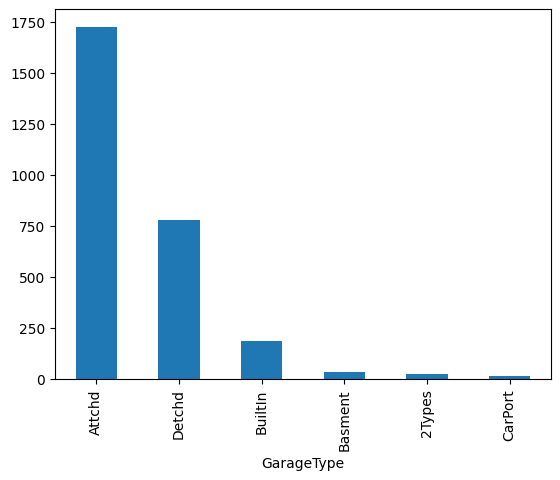

In [20]:
Df['GarageType'].value_counts().plot(kind='bar')

In the GarageType feature, the most frequent value is 'Attchd'. It'll make sense to impute this modal value into the null values to make a representative dataset.

In [21]:
Df['GarageType'] = Df['GarageType'].fillna('Attchd')

In [22]:
Df[categorical_features].isnull().sum()

,0
MSZoning,4
Street,0
LotShape,0
LandContour,0
Utilities,2
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


An easier way to do this is to calculate the mode of categorical features and impute it in the null values of that feature. Repeating this exercise for the features with null values more than 50 should lead to a sound result. For features with null values less than 50, we will drop the rows as it will not lead to big data loss.

In [23]:
#Imputing modal values in columns with categoical features having more than 50 null values:

Df['GarageFinish'] = Df['GarageFinish'].fillna(Df['GarageFinish'].mode().values[0])
Df['GarageQual'] = Df['GarageQual'].fillna(Df['GarageQual'].mode().values[0])
Df['GarageCond'] = Df['GarageCond'].fillna(Df['GarageCond'].mode().values[0])
Df['BsmtQual'] = Df['BsmtQual'].fillna(Df['BsmtQual'].mode().values[0])
Df['BsmtCond'] = Df['BsmtCond'].fillna(Df['BsmtCond'].mode().values[0])
Df['BsmtExposure'] = Df['BsmtExposure'].fillna(Df['BsmtExposure'].mode().values[0])
Df['BsmtFinType1'] = Df['BsmtFinType1'].fillna(Df['BsmtFinType1'].mode().values[0])
Df['BsmtFinType2'] = Df['BsmtFinType2'].fillna(Df['BsmtFinType2'].mode().values[0])

In [24]:
Df[categorical_features].isnull().sum()

,0
MSZoning,4
Street,0
LotShape,0
LandContour,0
Utilities,2
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [25]:
#Dropping rows with null values from columns with categorical features having less than 50 null values (essentially all rows with null values left in the dataframe):

Df.dropna(axis=0,inplace=True)

In [26]:
Df[categorical_features].isnull().sum()


,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [27]:
Df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


So, now, all null values have been intelligently taken care of.

### **Feature Scaling and Encoding:**

Feature scaling is performed on numerical features to bring them to a similar scale of values. This leads to optimization and lesser runtime for Linear Regression which used Gradient Descent to converge to a solution. Also, for categorical features, we will be encoding the values to bring all values into numerics.

In [28]:
#Determine range of values across numerical features/columns

Df[numerical_features].max() - Df[numerical_features].min()

,0
Id,2918.0
MSSubClass,170.0
LotFrontage,292.0
LotArea,213945.0
OverallQual,9.0
OverallCond,8.0
YearBuilt,138.0
YearRemodAdd,60.0
MasVnrArea,1600.0
BsmtFinSF1,5644.0


The range of values varies a lot among the numerical features. It is better to scale them.